## Introduction to Image Processing with Python
### Image Processing (RM1-VIS)
### University of Southern Denmark

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

#### Histogram Equalization

In [2]:
def plot_histogram(greyvalues, numberBits = 8, normed = False):
    valueRange = 2**numberBits  
    
    #plot histogram        
    fig, ax1 = plt.subplots()   
    
    if (normed):
        ax1.set_title("normed histogram")
    else:
        ax1.set_title("histogram")
    
    index = np.arange(valueRange)
    
    if (normed):
        ax1.bar(index, greyvalues  / float(np.sum(greyvalues)), 0.35, alpha=0.4, color='b')
    else:
        ax1.bar(index, greyvalues, 1, alpha=0.4, color='b')
    ax1.set_ylabel('count', color='b')
    ax1.set_xlabel('pixel intensities')
    ax1.set_xlim((0,valueRange))    
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
        
    #plot cdf
    cdf = np.cumsum(greyvalues)
    ax2 = ax1.twinx()    
    if (normed):
        ax2.plot(index, cdf / float(np.sum(greyvalues)), color = 'r') 
        ax2.set_ylim((0,1.1))
    else:
        ax2.plot(index, cdf, color = 'r')     
    ax2.set_ylabel('cdf', color = 'r')
    ax2.set_xlim((0,valueRange))
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    plt.show()    

C:\Users\marij\AppData\Local\Temp\ipykernel_35116\4130990286.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(imGray)


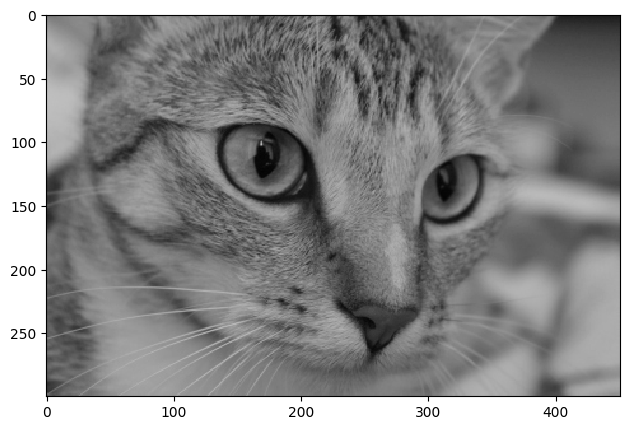

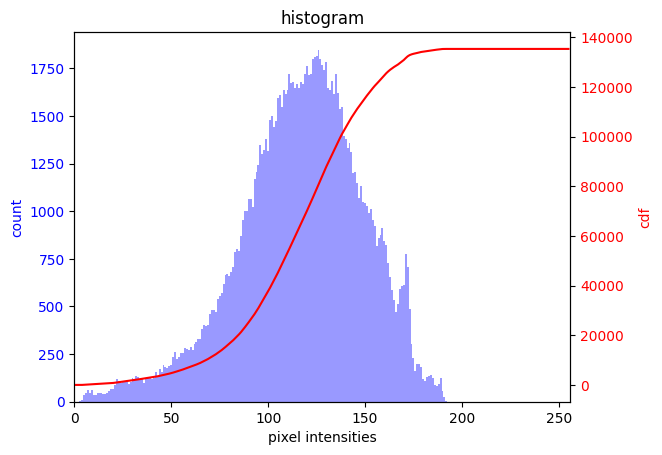

In [3]:
image = skimage.data.cat()
imGray = (skimage.color.rgb2gray(image) * 255.0).astype(np.uint8)
skimage.io.imshow(imGray)

bins, bins_c = skimage.exposure.histogram(imGray)
histogram = np.zeros(256)
np.put(histogram, bins_c, bins)

plot_histogram(histogram)

In [4]:
# implement histogram equalization
def histeq(image):
    new_im = np.copy(image) # image contains intensities between 0 and 1
    
    bins, bins_c = skimage.exposure.histogram(imGray)
    histogram = np.zeros(256)
    np.put(histogram, bins_c, bins)
    pdf = histogram/np.sum(histogram)

    # cdf array now contains values between 0 and 1
    cdf = np.cumsum(pdf)

    for i in range(0, np.size(image, 0)):
        for j in range(0, np. size(image, 1)):
            cdf_size = np.size(cdf)
            pixel_intensity = image[i, j]

            # Find the index in the cdf
            # corresponding to the intensity of the pixel
            index = round( pixel_intensity / 255.0 * (cdf_size - 1) )

            new_im[i, j] = 255.0*cdf[index] # replace pixel with cumulative probability at that intensity
    return new_im

C:\Users\marij\AppData\Local\Temp\ipykernel_35116\2996618348.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(imEq)


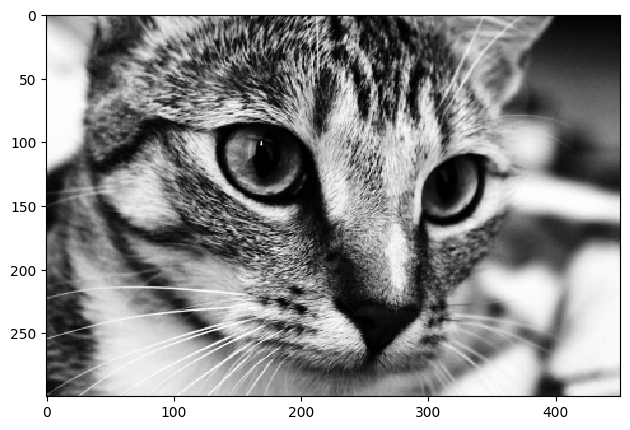

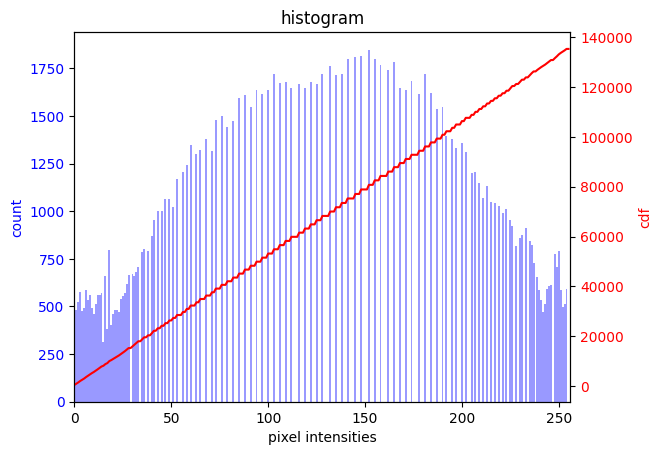

In [5]:
imEq = histeq(imGray)

skimage.io.imshow(imEq)

bins, bins_c = skimage.exposure.histogram(imEq)
histogram = np.zeros(256)
np.put(histogram, bins_c, bins)

plot_histogram(histogram)

### Rotate image

Implement a function which rotates grayscale images by a certain angle. Use bilinear interpolation.

In [6]:
def im_rotate(image, angle, padding):

    return image

C:\Users\marij\AppData\Local\Temp\ipykernel_35116\737462883.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(imGray)


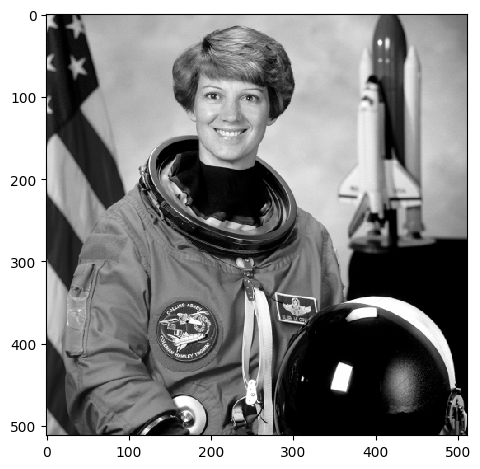

In [7]:
image = skimage.data.astronaut()
imGray = skimage.color.rgb2gray(image)
skimage.io.imshow(imGray)

C:\Users\marij\AppData\Local\Temp\ipykernel_35116\423478104.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(im_rotate(imGray, 40, 0))


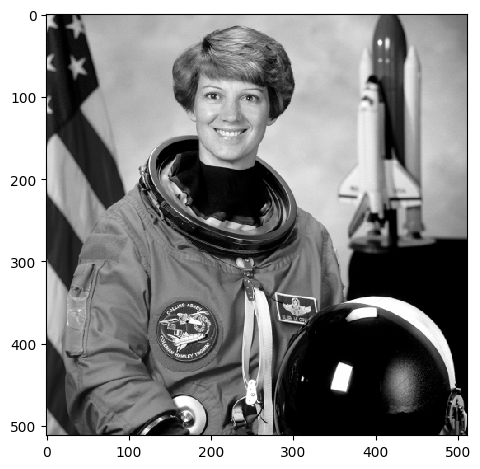

In [8]:
skimage.io.imshow(im_rotate(imGray, 40, 0))